In [196]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
# Read CSV files

denver_file = "Resources/Denver_Final.csv"


denver_df = pd.read_csv(denver_file, encoding= "unicode_escape")


In [61]:
# Evaluate data, drop na
denver_df.head()
denver_df = denver_df.dropna()
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115023 entries, 0 to 115022
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Reported Date  115023 non-null  object
 1   Year           115023 non-null  int64 
 2   Month          115023 non-null  object
 3   Month Value    115023 non-null  int64 
 4   City           115023 non-null  object
 5   Offense        115023 non-null  object
 6   Is Violent     115023 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.0+ MB


In [203]:
# Convert reported data to pandas datetime64 type and use DatetimeIndex to add year and month data
# NOTE:  First convert date from an object to datetime64 use info() method to confirm panda data type for Reporte Dates
denver_df["Reported Date"] = pd.to_datetime(denver_df["Reported Date"])
denver_df["Year"] = pd.DatetimeIndex(denver_df["Reported Date"]).year
denver_df["Month"] = pd.DatetimeIndex(denver_df["Reported Date"]).month
denver_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115023 entries, 0 to 115022
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Reported Date  115023 non-null  datetime64[ns]
 1   Year           115023 non-null  int64         
 2   Month          115023 non-null  int64         
 3   Month Value    115023 non-null  int64         
 4   City           115023 non-null  object        
 5   Offense        115023 non-null  object        
 6   Is Violent     115023 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 7.0+ MB


In [208]:
# Review offense types and cliean data (remove traffic violations)
denver_df["Offense"].value_counts()
dclean_df = denver_df.loc[denver_df["Offense"] != "traffic-accident"]
dclean_df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [132]:
# Convert datetime64 (int64index) to DatetimeIndex, TimedeltaIndex or PeriodIndex
# denver_df["New Date"] = pd.to_datetime(denver_df["Month Value"].astype(int), format="%x")


# Reset index to Reported Date
# trial_df = denver_df.set_index("Reported Date")

# Group data by month (frequency choice of "M" (month) or "W" (week))
# trial_df = denver_df.groupby(pd.Grouper(freq="M"))

trial1_df = denver_df.groupby(["Is Violent", "Month Value", "Month"]).count()
trial1_df

test1_df = denver_df.loc[denver_df["Is Violent"] == "Violent"].sort_values("Reported Date", ascending=True)
test1_df = denver_df.loc[denver_df["Is Violent"] == "Violent"].sort_values("Month", ascending=True)



In [133]:
# Group data by offense type and organize 
doffense_df = denver_df.groupby("Offense").count()
doffense_df = doffense_df.sort_values("Reported Date", ascending=False)
doffense_df.head(10)


,Reported Date,Year,Month,Month Value,City,Is Violent
Offense,,,,,,
traffic-accident,26686,26686,26686,26686,26686,26686
all-other-crimes,18729,18729,18729,18729,18729,18729
larceny,13102,13102,13102,13102,13102,13102
public-disorder,11966,11966,11966,11966,11966,11966
theft-from-motor-vehicle,11254,11254,11254,11254,11254,11254
auto-theft,7630,7630,7630,7630,7630,7630
other-crimes-against-persons,5962,5962,5962,5962,5962,5962
burglary,5916,5916,5916,5916,5916,5916
drug-alcohol,5675,5675,5675,5675,5675,5675


In [14]:
# Pie chart data

# Grab data for top 5 crimes
Traffic_df = denver_df.loc[denver_df["Offense"] == "traffic-accident"]
AllOther_df = denver_df.loc[denver_df["Offense"] == "all-other-crimes"]
Larceny_df = denver_df.loc[denver_df["Offense"] == "larceny"]
PubDisorder_df = denver_df.loc[denver_df["Offense"] == "public-disorder"]
TheftfromMV_df = denver_df.loc[denver_df["Offense"] == "theft-from-motor-vehicle"]

# Create data for charts
Traffic = Traffic_df["Offense"].count()
AllOther = AllOther_df["Offense"].count()
Larceny = Larceny_df["Offense"].count()
PubDisorder = PubDisorder_df["Offense"].count()
TheftfromMV = TheftfromMV_df["Offense"].count()
Total = doffense_df["Reported Date"].sum()
Other = Total - (Traffic - AllOther - Larceny - PubDisorder - TheftfromMV)

print(Traffic, AllOther, Larceny, PubDisorder, TheftfromMV, Other, Total)



26686 18729 13102 11966 11254 143388 115023


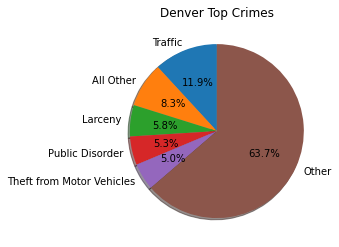

In [15]:
# Plot pie chart
plot_labels = ["Traffic", "All Other", "Larceny", "Public Disorder",
             "Theft from Motor Vehicles", "Other"]
plot_values = [Traffic, AllOther, Larceny, PubDisorder, TheftfromMV, Other]
plt.title("Denver Top Crimes")
plt.pie(plot_values, labels=plot_labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

In [ ]:
# Sort data by month 

In [201]:
# Violent / Non-violent crime trends

dtrend_df = denver_df.groupby(["Is Violent", "Year", "Month"]).count()
# dtrend_df = dtrend_df.sort_values(by=["Year", "Month"], ascending=True)
dtrend_df.head()

Reported Date  Month Value  City  Offense
Is Violent  Year Month                                           
Non-Violent 2019 3               6473         6473  6473     6473
                 4               6558         6558  6558     6558
                 5               6840         6840  6840     6840
                 6               6992         6992  6992     6992
                 7               7410         7410  7410     7410

In [193]:
# Break trend data into violent and non-violent data frames and sort by Year and Month
# Nonviolent data
nonviolent_df = dtrend_df.loc["Non-Violent"]
nonviolent_df = nonviolent_df.sort_values(by=["Year", "Month"], ascending=True)

# Violent data
violent_df = dtrend_df.loc["Violent"]
violent_df = violent_df.sort_values(by=["Year", "Month"], ascending=True)

#nonviolent_df = dtrend_df.loc["Non-Violent"]
#y_axis = nonviolent_df["Offense"]
#x_axis = violent_df.index

# index_value = nonviolent_df.loc["Year"]
# list(nonviolent_df.index)
list(nonvio_df["Offense"])

[6473,
 6558,
 6840,
 6992,
 7410,
 7546,
 7123,
 6928,
 6437,
 6442,
 7034,
 6289,
 5481,
 4848,
 6047,
 5918]

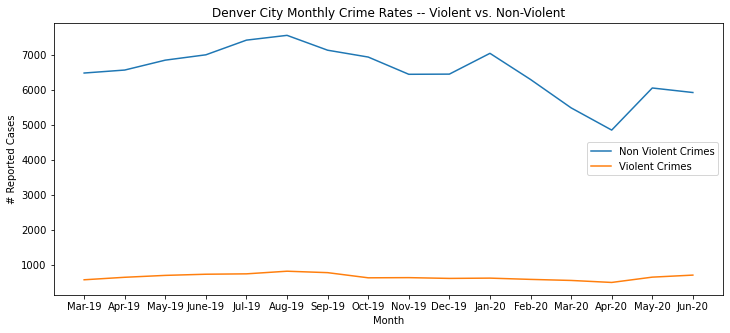

In [200]:
# Generate line plot as figure 2
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Denver City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(nonviolent_df["Offense"]), label="Non Violent Crimes")
plt.plot(list(violent_df["Offense"]), label="Violent Crimes")
plt.legend(loc="center right")
plt.show()


In [10]:
# Summary look at Violent crimes:
DVioSum_df = denver_df.loc[denver_df["Is Violent"] == "Violent"]
DVioSum_df = DVioSum_df.groupby("Offense").count()
DVioSum_df.head(10)


,Reported Date,Year,Month,Month Value,City,Is Violent
Offense,,,,,,
aggravated-assault,3502,3502,3502,3502,3502,3502
murder,102,102,102,102,102,102
other-crimes-against-persons,5962,5962,5962,5962,5962,5962
sexual-assault,1091,1091,1091,1091,1091,1091


In [11]:
# Violent crime trends
DVioTrend_df = denver_df.loc[denver_df["Is Violent"] == "Violent"].sort_values("Month", ascending=True)
DVioTrend_df = denver_df.loc[denver_df["Is Violent"] == "Violent"].sort_values("Month", ascending=True)
DVioTrend_df

Reported Date  Year  Month Value  City  Is Violent
Offense            Month                                                     
aggravated-assault 19-Apr            191   191          191   191         191
                   19-Aug            292   292          292   292         292
                   19-Dec            212   212          212   212         212
                   19-Jul            249   249          249   249         249
                   19-Jun            252   252          252   252         252
...                                  ...   ...          ...   ...         ...
sexual-assault     20-Feb             63    63           63    63          63
                   20-Jan             90    90           90    90          90
                   20-Jun             60    60           60    60          60
                   20-Mar             57    57           57    57          57
                   20-May             52    52           52    52          52

[64 rows x 5 columns]

In [12]:
# Plot Violent Crime Trends

# Step 1:  Create Violent Crime Plot Data
AggAssault = DVioTrend_df.loc["aggravated-assault"]
SexAssault = DVioTrend_df.loc["sexual-assault"]
OtherAssault = DVioTrend_df.loc["other-crimes-against-persons"]
Murder = DVioTrend_df.loc["murder"]

#plt.figure(figsize=(12, 5))
#plt.plot(DVioTrend_df_df.index, DVioTrend_df_df["Offense"], label="Non-Violent Crimes")
#plt.plot(violent_df.index, violent_df["Offense"], label="Violent Crimes")
#plt.legend(loc="center right")
#plt.title("Denver City Monthly Crime Rates -- Violent vs. Non-Violent")
#plt.xlabel("Month")
#plt.ylabel("# Reported Cases")
#plt.show()

Murder

,Reported Date,Year,Month Value,City,Is Violent
Month,,,,,
19-Apr,5,5,5,5,5
19-Aug,11,11,11,11,11
19-Dec,3,3,3,3,3
19-Jul,6,6,6,6,6
19-Jun,6,6,6,6,6
19-Mar,3,3,3,3,3
19-May,6,6,6,6,6
19-Nov,4,4,4,4,4
19-Oct,5,5,5,5,5
